# üíé Clustering RFM - Analyse Recency, Frequency, Monetary
## Segmentation Client avec la M√©thodologie RFM

**Objectif :** Cr√©er une segmentation bas√©e sur le mod√®le RFM (Recency, Frequency, Monetary)

**Qu'est-ce que RFM ?**
- **R (Recency)** : Depuis combien de temps le client a-t-il achet√© ? (Jours_Dernier_Achat)
- **F (Frequency)** : √Ä quelle fr√©quence le client ach√®te-t-il ? (Total_Achats)
- **M (Monetary)** : Combien le client d√©pense-t-il ? (Total_Depense)

**Avantages du RFM :**
1. ‚úÖ M√©thodologie √©prouv√©e dans le marketing
2. ‚úÖ Interpr√©tation tr√®s intuitive
3. ‚úÖ Permet de cr√©er des scores RFM (ex: 555 = Meilleur client)
4. ‚úÖ Compl√©mentaire au clustering K-Means standard

---

## üì¶ Phase 1 : Imports et Chargement

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("‚úÖ Biblioth√®ques import√©es")
print(f"üìÖ {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

‚úÖ Biblioth√®ques import√©es
üìÖ 2025-10-24 11:10:57


In [2]:
# Chargement des donn√©es
df = pd.read_csv('../01_Data/ML_DataSet.csv')

print("=" * 70)
print("CHARGEMENT DES DONN√âES")
print("=" * 70)
print(f"Shape : {df.shape}")
print(f"\n‚úÖ Donn√©es charg√©es avec succ√®s")

CHARGEMENT DES DONN√âES
Shape : (2237, 49)

‚úÖ Donn√©es charg√©es avec succ√®s


---
## üìä Phase 2 : Calcul des Scores RFM

In [3]:
# Cr√©er le dataset RFM
df_rfm = df[['ID_Client', 'Jours_Dernier_Achat', 'Total_Achats', 'Total_Depense']].copy()

# Renommer pour clart√©
df_rfm = df_rfm.rename(columns={
    'Jours_Dernier_Achat': 'R_Recency',
    'Total_Achats': 'F_Frequency',
    'Total_Depense': 'M_Monetary'
})

print("=" * 70)
print("CALCUL DES SCORES RFM")
print("=" * 70)
print("\nüìä Donn√©es RFM :")
df_rfm.head(10)

CALCUL DES SCORES RFM

üìä Donn√©es RFM :


ID_Client  R_Recency  F_Frequency  M_Monetary
0       5524         58           22        1617
1       2174         38            4          27
2       4141         26           20         776
3       6182         26            6          53
4       5324         94           14         422
5       7446         16           20         716
6        965         34           17         590
7       6177         32            8         169
8       4855         19            5          46
9       5899         68            1          49

In [4]:
# Statistiques descriptives RFM
print("\nüìä STATISTIQUES RFM :")
print("=" * 70)
df_rfm[['R_Recency', 'F_Frequency', 'M_Monetary']].describe()


üìä STATISTIQUES RFM :


R_Recency  F_Frequency  M_Monetary
count    2237.00      2237.00     2237.00
mean       49.10        12.54      605.74
std        28.96         7.21      601.84
min         0.00         0.00        5.00
25%        24.00         6.00       69.00
50%        49.00        12.00      396.00
75%        74.00        18.00     1045.00
max        99.00        32.00     2525.00

In [5]:
# Cr√©er les scores RFM (quintiles : 1-5)
# Note : Pour Recency, plus petit = meilleur (invers√©)

df_rfm['R_Score'] = pd.qcut(df_rfm['R_Recency'], q=5, labels=[5, 4, 3, 2, 1])  # Invers√©
df_rfm['F_Score'] = pd.qcut(df_rfm['F_Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
df_rfm['M_Score'] = pd.qcut(df_rfm['M_Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

# Score RFM combin√© (555 = Meilleur client possible)
df_rfm['RFM_Score'] = df_rfm['R_Score'].astype(str) + df_rfm['F_Score'].astype(str) + df_rfm['M_Score'].astype(str)

# Score num√©rique pour analyse
df_rfm['RFM_Score_Num'] = df_rfm['R_Score'].astype(int) + df_rfm['F_Score'].astype(int) + df_rfm['M_Score'].astype(int)

print("=" * 70)
print("SCORES RFM CALCUL√âS")
print("=" * 70)
print("\nExemples de scores RFM :")
df_rfm[['ID_Client', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Score_Num']].head(10)

SCORES RFM CALCUL√âS

Exemples de scores RFM :


ID_Client R_Score F_Score M_Score RFM_Score  RFM_Score_Num
0       5524       3       5       5       355             13
1       2174       4       1       1       411              6
2       4141       4       4       4       444             12
3       6182       4       2       1       421              7
4       5324       1       3       3       133              7
5       7446       5       4       4       544             13
6        965       4       4       3       443             11
7       6177       4       2       2       422              8
8       4855       5       1       1       511              7
9       5899       2       1       1       211              4

In [6]:
# Distribution des scores
print("\nüìä DISTRIBUTION DES SCORES :")
print("\nScore R (Recency) :")
print(df_rfm['R_Score'].value_counts().sort_index())
print("\nScore F (Frequency) :")
print(df_rfm['F_Score'].value_counts().sort_index())
print("\nScore M (Monetary) :")
print(df_rfm['M_Score'].value_counts().sort_index())

print("\nüìä Top 10 scores RFM :")
print(df_rfm['RFM_Score'].value_counts().head(10))


üìä DISTRIBUTION DES SCORES :

Score R (Recency) :
R_Score
5    456
4    448
3    450
2    437
1    446
Name: count, dtype: int64

Score F (Frequency) :
F_Score
1    448
2    447
3    447
4    447
5    448
Name: count, dtype: int64

Score M (Monetary) :
M_Score
1    448
2    447
3    447
4    447
5    448
Name: count, dtype: int64

üìä Top 10 scores RFM :
RFM_Score
522    87
411    81
311    81
511    75
122    72
433    71
111    71
322    71
133    68
422    67
Name: count, dtype: int64


---
## üéØ Phase 3 : Segmentation RFM Classique

In [7]:
# Segmentation RFM classique bas√©e sur les scores
def segment_rfm(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    
    # Champions : 555, 554, 544, 545, 454, 455, 445
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Fid√®les : 333, 334, 343, 344, 433, 434, 443, 444
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Fid√®les'
    
    # Clients Potentiels : Haute Recency mais faible F/M
    elif r >= 4 and (f <= 2 or m <= 2):
        return 'Potentiels'
    
    # Nouveaux Clients : Haute Recency, faible Frequency
    elif r >= 4 and f <= 2:
        return 'Nouveaux'
    
    # Endormis : Faible Recency mais ont √©t√© actifs
    elif r <= 2 and f >= 3:
        return 'Endormis'
    
    # Perdus : Faible R, F, M
    elif r <= 2 and f <= 2:
        return 'Perdus'
    
    # Autres
    else:
        return 'Autres'

df_rfm['Segment_RFM'] = df_rfm.apply(segment_rfm, axis=1)

print("=" * 70)
print("SEGMENTATION RFM CLASSIQUE")
print("=" * 70)
print("\nüìä Distribution des segments RFM :")
segment_counts = df_rfm['Segment_RFM'].value_counts()
for segment, count in segment_counts.items():
    pct = (count / len(df_rfm)) * 100
    print(f"   {segment:<15} : {count:>5} clients ({pct:>5.1f}%)")

SEGMENTATION RFM CLASSIQUE

üìä Distribution des segments RFM :
   Endormis        :   543 clients ( 24.3%)
   Fid√®les         :   490 clients ( 21.9%)
   Potentiels      :   374 clients ( 16.7%)
   Perdus          :   340 clients ( 15.2%)
   Champions       :   304 clients ( 13.6%)
   Autres          :   186 clients (  8.3%)


In [8]:
# Profil de chaque segment RFM
print("\n" + "=" * 70)
print("PROFIL DES SEGMENTS RFM")
print("=" * 70)

# Joindre avec le dataset original
df_full = df.merge(df_rfm[['ID_Client', 'Segment_RFM', 'RFM_Score_Num']], on='ID_Client')

for segment in df_rfm['Segment_RFM'].unique():
    seg_data = df_full[df_full['Segment_RFM'] == segment]
    n = len(seg_data)
    pct = (n / len(df_full)) * 100
    
    print(f"\n{'='*70}")
    print(f"üéØ SEGMENT: {segment.upper()}")
    print(f"{'='*70}")
    print(f"\nüìà Taille : {n} clients ({pct:.1f}%)")
    
    print(f"\nüí∞ PROFIL :")
    print(f"   Recency (jours)          : {seg_data['Jours_Dernier_Achat'].mean():>10,.0f} jours")
    print(f"   Frequency (achats)       : {seg_data['Total_Achats'].mean():>10,.1f}")
    print(f"   Monetary (d√©pense)       : {seg_data['Total_Depense'].mean():>10,.0f} ‚Ç¨")
    print(f"   Revenu moyen             : {seg_data['Revenu'].mean():>10,.0f} ‚Ç¨")
    print(f"   Taux de r√©ponse          : {seg_data['Reponse_Derniere_Campagne'].mean():>10,.2%}")


PROFIL DES SEGMENTS RFM

üéØ SEGMENT: FID√àLES

üìà Taille : 490 clients (21.9%)

üí∞ PROFIL :
   Recency (jours)          :         36 jours
   Frequency (achats)       :       15.8
   Monetary (d√©pense)       :        785 ‚Ç¨
   Revenu moyen             :     59,996 ‚Ç¨
   Taux de r√©ponse          :     18.16%

üéØ SEGMENT: POTENTIELS

üìà Taille : 374 clients (16.7%)

üí∞ PROFIL :
   Recency (jours)          :         19 jours
   Frequency (achats)       :        5.1
   Monetary (d√©pense)       :         70 ‚Ç¨
   Revenu moyen             :     34,607 ‚Ç¨
   Taux de r√©ponse          :     15.51%

üéØ SEGMENT: CHAMPIONS

üìà Taille : 304 clients (13.6%)

üí∞ PROFIL :
   Recency (jours)          :         19 jours
   Frequency (achats)       :       20.8
   Monetary (d√©pense)       :      1,237 ‚Ç¨
   Revenu moyen             :     71,422 ‚Ç¨
   Taux de r√©ponse          :     31.91%

üéØ SEGMENT: ENDORMIS

üìà Taille : 543 clients (24.3%)

üí∞ PROFIL :
   Recency (j

---
## üéØ Phase 4 : Clustering K-Means sur Features RFM Enrichies

In [9]:
# CORRECTION : Fusionner df_rfm avec df_full pour avoir toutes les colonnes
# Ajouter les colonnes RFM originales (R_Recency, F_Frequency, M_Monetary) √† df_full
df_full = df_full.merge(df_rfm[['ID_Client', 'R_Recency', 'F_Frequency', 'M_Monetary']], on='ID_Client', how='left')

# Features RFM enrichies pour clustering
features_rfm_plus = [
    # RFM de base
    'R_Recency', 'F_Frequency', 'M_Monetary',
    
    # Features additionnelles
    'Revenu', 'Age_Inscription', 'Total_Enfants',
    'Depense_Moy_Par_Achat',
    'Achat_Vins', 'Achat_Viandes',
    'Achats_En_Ligne', 'Achats_En_Magasin',
    'Engagement_Web', 'Total_Campagnes_Acceptees'
]

# Cr√©er dataset pour clustering
df_cluster = df_full[features_rfm_plus].copy()

# CORRECTION : G√©rer les valeurs manquantes AVANT la normalisation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_cluster_imputed = pd.DataFrame(
    imputer.fit_transform(df_cluster),
    columns=features_rfm_plus,
    index=df_cluster.index
)

# V√©rifier qu'il n'y a plus de NaN
print("=" * 70)
print("V√âRIFICATION DES DONN√âES")
print("=" * 70)
print(f"Valeurs manquantes avant imputation : {df_cluster.isnull().sum().sum()}")
print(f"Valeurs manquantes apr√®s imputation : {df_cluster_imputed.isnull().sum().sum()}")

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_imputed)

print("\n" + "=" * 70)
print("PR√âPARATION POUR CLUSTERING RFM+")
print("=" * 70)
print(f"\nNombre de features : {len(features_rfm_plus)}")
print(f"Dataset normalis√© : {X_scaled.shape}")
print(f"Contient NaN : {np.isnan(X_scaled).any()}")
print("\n‚úÖ Pr√©paration termin√©e")

V√âRIFICATION DES DONN√âES
Valeurs manquantes avant imputation : 4
Valeurs manquantes apr√®s imputation : 0

PR√âPARATION POUR CLUSTERING RFM+

Nombre de features : 13
Dataset normalis√© : (2237, 13)
Contient NaN : False

‚úÖ Pr√©paration termin√©e


In [10]:
# Test K=3, 4, 5 pour RFM+
K_range = [3, 4, 5]
results = []

print("=" * 70)
print("TEST CLUSTERING RFM+ (K=3, 4, 5)")
print("=" * 70)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    
    silhouette = silhouette_score(X_scaled, labels)
    
    results.append({
        'K': k,
        'Silhouette': silhouette
    })
    
    print(f"\nK={k} | Silhouette Score = {silhouette:.3f}")

results_df = pd.DataFrame(results)
best_k = results_df.loc[results_df['Silhouette'].idxmax(), 'K']
print(f"\nüí° Meilleur K pour RFM+ : K={int(best_k)}")

TEST CLUSTERING RFM+ (K=3, 4, 5)

K=3 | Silhouette Score = 0.256

K=4 | Silhouette Score = 0.233

K=5 | Silhouette Score = 0.156

üí° Meilleur K pour RFM+ : K=3


In [11]:
# Clustering final avec le meilleur K
K_OPTIMAL = int(best_k)

kmeans_final = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init=20)
clusters = kmeans_final.fit_predict(X_scaled)

df_full['Cluster_RFM_Plus'] = clusters

print("=" * 70)
print(f"CLUSTERING RFM+ FINAL (K={K_OPTIMAL})")
print("=" * 70)
print(f"\nüìä Distribution des clusters :")
print(df_full['Cluster_RFM_Plus'].value_counts().sort_index())

CLUSTERING RFM+ FINAL (K=3)

üìä Distribution des clusters :
Cluster_RFM_Plus
0     667
1     481
2    1089
Name: count, dtype: int64


In [12]:
# Profil des clusters RFM+
print("\n" + "=" * 70)
print("PROFIL DES CLUSTERS RFM+")
print("=" * 70)

for cluster_id in range(K_OPTIMAL):
    cluster_data = df_full[df_full['Cluster_RFM_Plus'] == cluster_id]
    n = len(cluster_data)
    pct = (n / len(df_full)) * 100
    
    print(f"\n{'='*70}")
    print(f"üéØ CLUSTER {cluster_id}")
    print(f"{'='*70}")
    print(f"\nüìà Taille : {n} clients ({pct:.1f}%)")
    
    print(f"\nüìä RFM :")
    print(f"   Recency (jours)          : {cluster_data['Jours_Dernier_Achat'].mean():>10,.0f}")
    print(f"   Frequency (achats)       : {cluster_data['Total_Achats'].mean():>10,.1f}")
    print(f"   Monetary (d√©pense)       : {cluster_data['Total_Depense'].mean():>10,.0f} ‚Ç¨")
    
    print(f"\nüí∞ PROFIL COMPL√âMENTAIRE :")
    print(f"   Revenu moyen             : {cluster_data['Revenu'].mean():>10,.0f} ‚Ç¨")
    print(f"   √Çge moyen                : {cluster_data['Age_Inscription'].mean():>10,.1f} ans")
    print(f"   Enfants moyens           : {cluster_data['Total_Enfants'].mean():>10,.2f}")
    print(f"   Taux de r√©ponse          : {cluster_data['Reponse_Derniere_Campagne'].mean():>10,.2%}")


PROFIL DES CLUSTERS RFM+

üéØ CLUSTER 0

üìà Taille : 667 clients (29.8%)

üìä RFM :
   Recency (jours)          :         47
   Frequency (achats)       :       18.1
   Monetary (d√©pense)       :        778 ‚Ç¨

üí∞ PROFIL COMPL√âMENTAIRE :
   Revenu moyen             :     59,780 ‚Ç¨
   √Çge moyen                :       48.0 ans
   Enfants moyens           :       1.02
   Taux de r√©ponse          :     11.69%

üéØ CLUSTER 1

üìà Taille : 481 clients (21.5%)

üìä RFM :
   Recency (jours)          :         51
   Frequency (achats)       :       19.4
   Monetary (d√©pense)       :      1,495 ‚Ç¨

üí∞ PROFIL COMPL√âMENTAIRE :
   Revenu moyen             :     78,231 ‚Ç¨
   √Çge moyen                :       43.7 ans
   Enfants moyens           :       0.17
   Taux de r√©ponse          :     32.22%

üéØ CLUSTER 2

üìà Taille : 1089 clients (48.7%)

üìä RFM :
   Recency (jours)          :         49
   Frequency (achats)       :        6.1
   Monetary (d√©pense)       :      

---
## üìä Phase 5 : Visualisations RFM

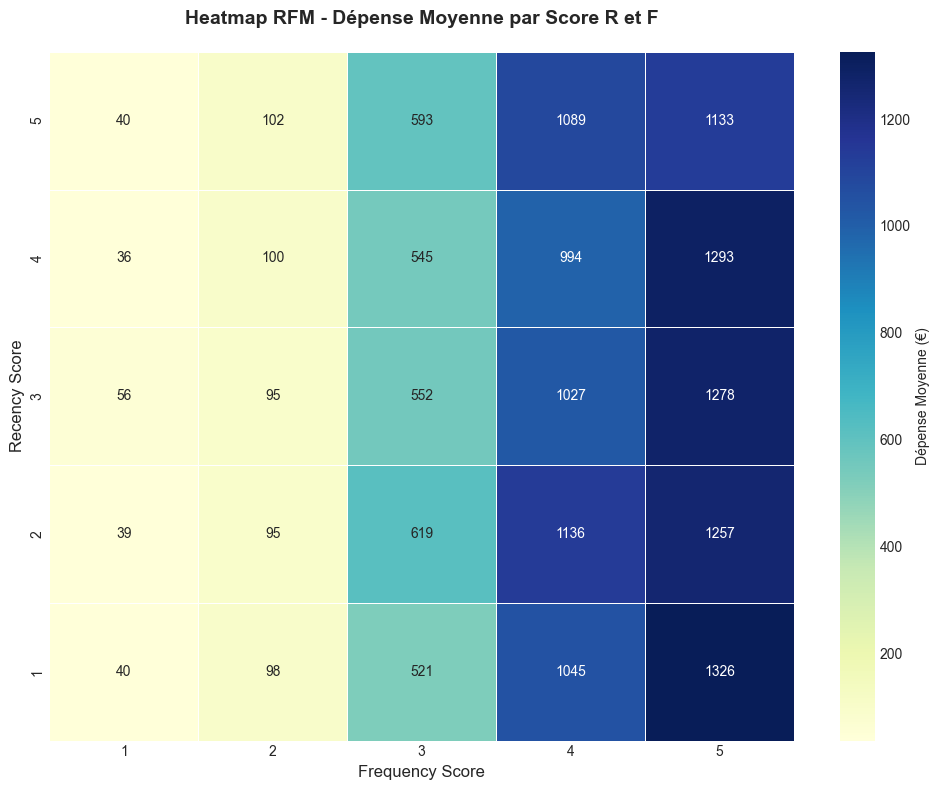

‚úÖ Heatmap RFM cr√©√©e


In [13]:
# Heatmap RFM
plt.figure(figsize=(10, 8))

# Cr√©er matrice R vs F (moyenne de M)
rfm_matrix = df_rfm.groupby(['R_Score', 'F_Score'])['M_Monetary'].mean().unstack()

sns.heatmap(
    rfm_matrix,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    cbar_kws={'label': 'D√©pense Moyenne (‚Ç¨)'},
    linewidths=0.5
)
plt.title('Heatmap RFM - D√©pense Moyenne par Score R et F', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Frequency Score', fontsize=12)
plt.ylabel('Recency Score', fontsize=12)
plt.tight_layout()
plt.show()

print("‚úÖ Heatmap RFM cr√©√©e")

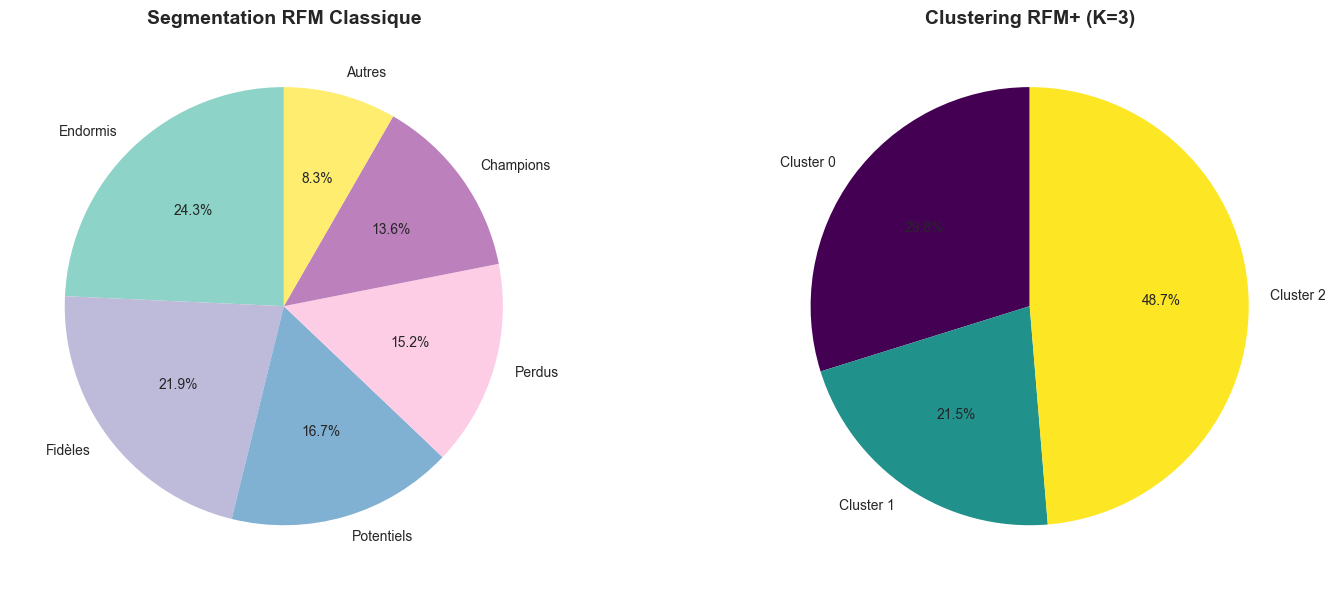

‚úÖ Visualisations cr√©√©es


In [14]:
# Distribution des segments RFM
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Segmentation classique
segment_counts = df_rfm['Segment_RFM'].value_counts()
colors_1 = plt.cm.Set3(np.linspace(0, 1, len(segment_counts)))
axes[0].pie(
    segment_counts.values,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_1
)
axes[0].set_title('Segmentation RFM Classique', fontsize=14, fontweight='bold')

# Clustering RFM+
cluster_counts = df_full['Cluster_RFM_Plus'].value_counts().sort_index()
colors_2 = plt.cm.viridis(np.linspace(0, 1, len(cluster_counts)))
axes[1].pie(
    cluster_counts.values,
    labels=[f'Cluster {i}' for i in cluster_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_2
)
axes[1].set_title(f'Clustering RFM+ (K={K_OPTIMAL})', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("‚úÖ Visualisations cr√©√©es")

---
## üìä Phase 6 : Comparaison Approches RFM vs K-Means Standard

In [15]:
print("=" * 70)
print("COMPARAISON DES APPROCHES DE CLUSTERING")
print("=" * 70)

print("\nüéØ APPROCHE 1 : Segmentation RFM Classique")
print("   Avantages :")
print("      ‚úÖ Tr√®s intuitive et facile √† expliquer")
print("      ‚úÖ Segments actionnables ('Champions', 'Endormis', etc.)")
print("      ‚úÖ Pas besoin d'algorithme de ML")
print("   Inconv√©nients :")
print("      ‚ùå R√®gles fixes (peut manquer de nuances)")
print("      ‚ùå Ne capture que R, F, M")

print("\nüéØ APPROCHE 2 : Clustering RFM+ (K-Means avec features enrichies)")
print("   Avantages :")
print("      ‚úÖ Int√®gre RFM + autres comportements (web, produits, etc.)")
print("      ‚úÖ D√©tection automatique des segments")
print(f"      ‚úÖ Silhouette Score : {results_df[results_df['K'] == K_OPTIMAL]['Silhouette'].values[0]:.3f}")
print("   Inconv√©nients :")
print("      ‚ùå Moins intuitif pour non-techniciens")
print("      ‚ùå N√©cessite de nommer les clusters manuellement")

print("\nüéØ APPROCHE 3 : K-Means Standard (notebook principal)")
print("   Avantages :")
print("      ‚úÖ Capture toutes les dimensions comportementales")
print("      ‚úÖ Tr√®s flexible")
print("   Inconv√©nients :")
print("      ‚ùå Silhouette Score plus faible (0.267)")
print("      ‚ùå Clusters moins √©quilibr√©s (47% dans un seul cluster)")

print("\nüí° RECOMMANDATION FINALE :")
print("   üèÜ Utiliser l'APPROCHE HYBRIDE :")
print("      1. Segmentation RFM classique pour l'√©quipe marketing (facile)")
print("      2. Clustering RFM+ pour analyse avanc√©e et ciblage fin")
print("      3. Croiser les deux pour valider la coh√©rence")

print("\n‚úÖ Analyse RFM termin√©e avec succ√®s")
print(f"üìÖ {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 70)

COMPARAISON DES APPROCHES DE CLUSTERING

üéØ APPROCHE 1 : Segmentation RFM Classique
   Avantages :
      ‚úÖ Tr√®s intuitive et facile √† expliquer
      ‚úÖ Segments actionnables ('Champions', 'Endormis', etc.)
      ‚úÖ Pas besoin d'algorithme de ML
   Inconv√©nients :
      ‚ùå R√®gles fixes (peut manquer de nuances)
      ‚ùå Ne capture que R, F, M

üéØ APPROCHE 2 : Clustering RFM+ (K-Means avec features enrichies)
   Avantages :
      ‚úÖ Int√®gre RFM + autres comportements (web, produits, etc.)
      ‚úÖ D√©tection automatique des segments
      ‚úÖ Silhouette Score : 0.256
   Inconv√©nients :
      ‚ùå Moins intuitif pour non-techniciens
      ‚ùå N√©cessite de nommer les clusters manuellement

üéØ APPROCHE 3 : K-Means Standard (notebook principal)
   Avantages :
      ‚úÖ Capture toutes les dimensions comportementales
      ‚úÖ Tr√®s flexible
   Inconv√©nients :
      ‚ùå Silhouette Score plus faible (0.267)
      ‚ùå Clusters moins √©quilibr√©s (47% dans un seul cluster)



---
## üíæ Phase 7 : Export des R√©sultats RFM

In [16]:
# Sauvegarder les r√©sultats
df_full.to_csv('../01_Data/ML_DataSet_with_RFM.csv', index=False)
print("üíæ Dataset avec RFM sauvegard√© : ML_DataSet_with_RFM.csv")

# Cr√©er un r√©sum√© RFM
rfm_summary = df_rfm.groupby('Segment_RFM').agg({
    'R_Recency': 'mean',
    'F_Frequency': 'mean',
    'M_Monetary': 'mean',
    'RFM_Score_Num': 'mean',
    'ID_Client': 'count'
}).rename(columns={'ID_Client': 'Nombre_Clients'}).round(2)

rfm_summary.to_csv('rfm_summary.csv')
print("üíæ R√©sum√© RFM sauvegard√© : rfm_summary.csv")

print("\n‚úÖ Export termin√©")

üíæ Dataset avec RFM sauvegard√© : ML_DataSet_with_RFM.csv
üíæ R√©sum√© RFM sauvegard√© : rfm_summary.csv

‚úÖ Export termin√©
